# Basics of deep learning - Binary and Multiclass classification

By Etai Zilberman, Bra Ara

## Sign Language Digits With PyTorch
Sign Language Digits dataset contains 5,000 grayscale images in 10 categories. The images show individual articles of hand sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/344389112/figure/fig8/AS:941467451260937@1601474740275/Sample-images-from-ASL-with-digits-dataset.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>





The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of numbers ranging from '0' to '9'. These correspond to the *class* of hand sign digit the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Hand Sign Zero</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hand Sign One</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Hand Sign Two</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Hand Sign Three</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Hand Sign Four</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Hand Sign Five</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hand Sign Six</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Hand Sign Seven</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Hand Sign Eight</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Hand Sign Nine</td>
  </tr>
</table>


# Neural Network with PyTorch part 1 (Binary Classification)

## Import Libraries

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ["TORCH_USE_CUDA_DSA"] = 'TRUE'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import time
start = time.time()

time: 953 µs (started: 2025-01-18 15:43:32 +00:00)


## Download Dataset

In [ ]:
%%script echo skipping
%%capture
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
%load_ext autotime

time: 8.94 s (started: 2025-01-18 15:43:33 +00:00)


Loading the dataset as NumPy arrays:

* The `dataset` file is a NumPy array containing the image pixles. As you can see, it includes 5,000 rows for each image and 784 columns for each pixel in the image (28x28).
* The `labels` file is a NumPy array containing the images labels. As you can see, it includes 5,000 rows for each image corresponding to the dataset.

In [ ]:
%%script echo skipping
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 48.4 ms (started: 2025-01-18 15:43:42 +00:00)


Loading a random sample for testing

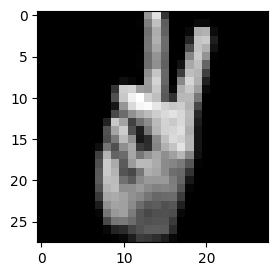

time: 108 ms (started: 2025-01-18 15:43:42 +00:00)


In [ ]:
%%script echo skipping
plt.figure(figsize=(3, 3))
plt.imshow(X[1000].reshape(28,28), cmap='gray')
plt.show()

##Define device - Cuda or CPU


In [ ]:
%%script echo skipping
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
print(device)

True
cuda
time: 5.99 ms (started: 2025-01-18 15:43:42 +00:00)


## Data preprocessing


### Feature scaling

In [ ]:
%%script echo skipping
X = X /255
examples = y.shape[0]
Y = y.reshape(1, examples)
X.shape

(5000, 784)

time: 17.9 ms (started: 2025-01-18 15:43:42 +00:00)


### Selecting two classes

In [ ]:
%%script echo skipping
classes = ["7", "8"]

time: 337 µs (started: 2025-01-18 15:43:42 +00:00)


###Preprocessing the data

In [ ]:
%%script echo skipping
from torch.utils.data import DataLoader, RandomSampler, TensorDataset
from sklearn.model_selection import train_test_split

class_mask = np.isin(y, classes)
filtered_X = X[class_mask]
filtered_y = y[class_mask]

binary_y = np.where(filtered_y == classes[0], 0, 1)

X_train, X_test, y_train, y_test = train_test_split(filtered_X, binary_y, test_size=0.2, random_state=42, stratify=binary_y)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_sampler = RandomSampler(train_dataset)
train_loader = DataLoader(train_dataset, sampler=train_sampler, batch_size=64)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_sampler = RandomSampler(test_dataset)
test_loader = DataLoader(test_dataset, batch_size=64)


X_train shape: (800, 784), y_train shape: (800,)
X_test shape: (200, 784), y_test shape: (200,)
time: 11 ms (started: 2025-01-18 15:43:42 +00:00)


#### Generate a random sample with data loader for testing

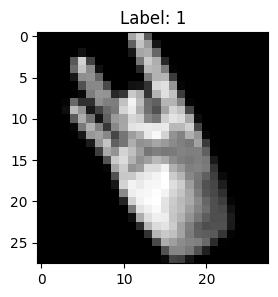

time: 115 ms (started: 2025-01-18 15:43:42 +00:00)


In [ ]:
%%script echo skipping
import random
# Get a random batch from the train_loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Choose a random image from the batch
index = random.randint(0, images.shape[0]-1)
image = images[index].cpu().numpy().reshape(28, 28)
label = int(labels[index].cpu().numpy())


plt.figure(figsize=(3, 3))
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.show()

### The network


We use `BCEWithLogitsLoss()` as the loss function so we kept the output value as it is (without using any activation function like sigmoid at the end of the net)

In [ ]:
%%script echo skipping
from torch import nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
  def __init__(self, size_list):
    super(NeuralNetwork, self).__init__()
    layers = []
    self.size_list = size_list
    for i in range(len(size_list) - 2):
        layers.append(nn.Linear(size_list[i], size_list[i+1]))
        layers.append(nn.ReLU())
    layers.append(nn.Linear(size_list[-2], size_list[-1]))
    self.net = nn.Sequential(*layers)

  def forward(self, x):
    return self.net(x)

time: 1.63 ms (started: 2025-01-18 15:43:42 +00:00)


784 pixles of a picture as an input layer, one hidden layer, single desicion-neuron

In [ ]:
%%script echo skipping
model = NeuralNetwork([28*28, 64, 1]).to(device)

print(model)

NeuralNetwork(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)
time: 2.63 ms (started: 2025-01-18 15:43:42 +00:00)


### The Optimizer


We chose the Adam optimizer

In [ ]:
%%script echo skipping
from torch import optim
optimizer = optim.Adam(model.parameters())

time: 375 µs (started: 2025-01-18 15:43:42 +00:00)


### Loss Function


Binary - Cross - Entropy with logits

In [ ]:
%%script echo skipping
loss = nn.BCEWithLogitsLoss()

time: 252 µs (started: 2025-01-18 15:43:42 +00:00)


### Training


In [ ]:
%%script echo skipping
# Train epoch function
import time
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    start_time = time.time()

    for batch_idx, (data, target) in enumerate(train_loader):
        target = target.view(-1, 1).float()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()

        # Calculate accuracy for this batch
        predicted = (output > 0.5).float()
        correct_predictions += (predicted == target).sum().item()
        total_predictions += target.size(0)

    end_time = time.time()
    running_loss /= len(train_loader)
    train_accuracy = 100 * correct_predictions / total_predictions

    print('Training Loss: ', running_loss, 'Time: ', end_time - start_time, 's', 'Accuracy: ', train_accuracy, '%')
    return running_loss, train_accuracy

time: 936 µs (started: 2025-01-18 15:43:42 +00:00)


Training the model for `numner_of_epochs` times and printing loss and accuracy of each epoch

In [ ]:
%%script echo skipping
numner_of_epochs = 10

train_losses = []
train_accu = []

for epoch in range(numner_of_epochs):
  print('Epoch ', epoch + 1)
  train_epoch_loss, train_epoch_accuracy = train_epoch(model, train_loader, loss, optimizer)
  train_losses.append(train_epoch_loss)
  train_accu.append(train_epoch_accuracy)


Epoch  1
Training Loss:  0.6628999801782461 Time:  0.03783273696899414 s Accuracy:  53.625 %
Epoch  2
Training Loss:  0.5730035717670734 Time:  0.043019771575927734 s Accuracy:  67.375 %
Epoch  3
Training Loss:  0.4755038068844722 Time:  0.05800437927246094 s Accuracy:  76.5 %
Epoch  4
Training Loss:  0.387682712995089 Time:  0.03883218765258789 s Accuracy:  84.75 %
Epoch  5
Training Loss:  0.31921255130034226 Time:  0.03849530220031738 s Accuracy:  89.125 %
Epoch  6
Training Loss:  0.26028971947156465 Time:  0.03649330139160156 s Accuracy:  91.625 %
Epoch  7
Training Loss:  0.21450194831077868 Time:  0.03403925895690918 s Accuracy:  94.0 %
Epoch  8
Training Loss:  0.18172777616060698 Time:  0.0336461067199707 s Accuracy:  95.25 %
Epoch  9
Training Loss:  0.1530183582351758 Time:  0.03923296928405762 s Accuracy:  96.875 %
Epoch  10
Training Loss:  0.13401384479724443 Time:  0.03661084175109863 s Accuracy:  97.125 %
time: 432 ms (started: 2025-01-18 15:43:42 +00:00)


#### Loss and Accuracy Visualization

##### Loss during training

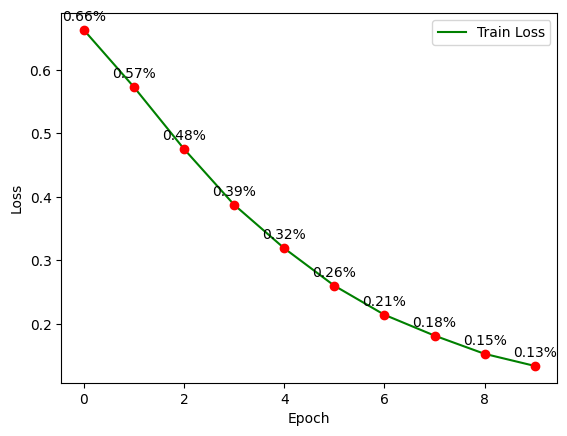

time: 194 ms (started: 2025-01-18 15:43:43 +00:00)


In [ ]:
%%script echo skipping
plt.plot(train_losses, label='Train Loss',color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
for i in range(0, len(train_losses)):
    acc = train_losses[i]
    plt.plot(i, acc, 'o', color='red')
    plt.text(i, acc + 0.01, f'{acc:.2f}%', ha='center', va='bottom',color='black')
plt.show()

##### Accuracy during training

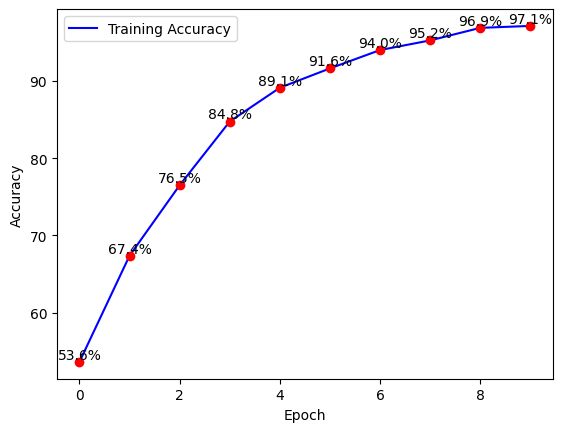

Training accuracy: 97.125 %
time: 268 ms (started: 2025-01-18 15:43:43 +00:00)


In [ ]:
%%script echo skipping
plt.plot(train_accu, label='Training Accuracy',color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
for i in range(0, len(train_accu)):
    acc = train_accu[i]
    plt.plot(i, acc, 'o', color='red')
    plt.text(i, acc + 0.01, f'{acc:.1f}%', ha='center', va='bottom',color='black')
plt.show()
print(f"Training accuracy: {train_accu[-1]} %")

### Testing


In [ ]:
%%script echo skipping
from sklearn.metrics import accuracy_score

def test_model(model, test_loader, criterion):
    with torch.no_grad():
        model.eval()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        all_predictions = []

        for batch_idx, (data, target) in enumerate(test_loader):
            target = target.view(-1, 1).float()
            outputs = model(data)
            loss = criterion(outputs, target)
            running_loss += loss.item()

            # Calculate accuracy and store predictions for this batch
            predicted = (outputs > 0.5).float()
            correct_predictions += (predicted == target).sum().item()
            total_predictions += target.size(0)
            all_predictions.append(predicted.cpu().numpy())

        running_loss /= len(test_loader)
        test_accuracy = 100 * correct_predictions / total_predictions
        all_predictions = np.concatenate(all_predictions)

        print('Testing Loss:', running_loss, ', Accuracy:',
              accuracy_score(y_test, all_predictions)*100, '%')
        return running_loss, test_accuracy, all_predictions

time: 1.18 ms (started: 2025-01-18 15:43:43 +00:00)


#### Testing the model and printing loss and accuracy

In [ ]:
%%script echo skipping
test_loss, test_accuracy, y_pred = test_model(model, test_loader, loss)

Testing Loss: 0.17282816767692566 , Accuracy: 93.0 %
time: 19.9 ms (started: 2025-01-18 15:43:43 +00:00)


#### Model Evaluation - Confusion Matrix


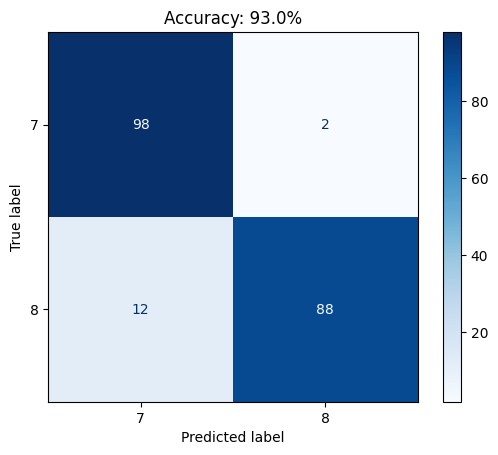

time: 219 ms (started: 2025-01-18 15:43:43 +00:00)


In [ ]:
%%script echo skipping

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

cm_display.plot(cmap=plt.cm.Blues)
plt.title(f'Accuracy: {test_accuracy:.1f}%')
plt.show()

---
<br>


# Neural Network with PyTorch part 2 (Multiclass Classification)

## Import Libraries

In [ ]:
%%capture
!pip install ipython-autotime
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%load_ext autotime

time: 3.12 s (started: 2025-01-18 15:43:44 +00:00)


## Load Dataset

In [ ]:
%%script echo skipping

loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 62.4 ms (started: 2025-01-18 15:43:47 +00:00)


## Data preprocessing

### Feature scaling

In [ ]:
%%script echo skipping

X = X / 255
classes = set(y)
classes

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

time: 10.9 ms (started: 2025-01-18 15:43:47 +00:00)


### Preprocessing the data

Splitting the data into Train set, Validation set and Test set

In [ ]:
%%script echo skipping

from torch.utils.data import DataLoader, RandomSampler, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split X_train into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25,
    random_state=42, stratify=y_train)  # 0.25 x 0.8 = 0.2 of the original data

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Encode string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long).to(device)

print(y_train_tensor.unique())
print(y_val_tensor.unique())
print(y_test_tensor.unique())


X_train shape: (3000, 784), y_train shape: (3000,)
X_val shape: (1000, 784), y_val shape: (1000,)
X_test shape: (1000, 784), y_test shape: (1000,)
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device='cuda:0')
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device='cuda:0')
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device='cuda:0')
time: 75.1 ms (started: 2025-01-18 15:43:47 +00:00)


Creating dataloaders with `batch_size=64`

In [ ]:
%%script echo skipping

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_sampler = RandomSampler(train_dataset)
train_loader = DataLoader(train_dataset, sampler=train_sampler, batch_size=64)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)


print("Data preparation complete.")

Data preparation complete.
time: 1.78 ms (started: 2025-01-18 15:43:47 +00:00)


## Models

### Base Model

In [ ]:
%%script echo skipping

class Base_Model(nn.Module):
    def __init__(self, size_list):
        super(Base_Model, self).__init__()
        layers = []
        self.size_list = size_list
        for i in range(len(size_list) - 2):
            layers.append(nn.Linear(size_list[i], size_list[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(size_list[-2], size_list[-1]))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

time: 789 µs (started: 2025-01-18 15:43:47 +00:00)


#### Train epoch function

In [ ]:
%%script echo skipping

from sklearn.metrics import accuracy_score, classification_report
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    start_time = time.time()
    all_preds = []
    all_labels = []

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()

        #  Calculate accuracy for this batch
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(target.cpu().numpy())

    end_time = time.time()
    running_loss /= len(train_loader)
    train_acc = accuracy_score(all_labels, all_preds)

    print('Time: ', end_time - start_time, 's')
    print('Training Loss: ', running_loss)
    print(f"Train Accuracy Score: {(train_acc * 100)}")
    return running_loss, train_acc

time: 1.05 ms (started: 2025-01-18 15:43:47 +00:00)


#### Validation function

In [ ]:
%%script echo skipping

from sklearn.metrics import accuracy_score, classification_report
def val_model(model, val_loader, criterion):
    with torch.no_grad():
        model.eval()
        running_loss = 0.0
        total_predictions = 0
        correct_predictions = 0
        all_preds = []
        all_labels = []
        for batch_idx, (data, target) in enumerate(val_loader):
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            # for the accuracy and clasification report
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(target.cpu().numpy())

            loss = criterion(outputs, target)
            running_loss += loss.item()

        running_loss /= len(val_loader)
        test_acc = accuracy_score(all_labels, all_preds)

        print('Validation Loss: ', running_loss)
        print(f"Validation Accuracy Score: {(test_acc * 100)}")

        return running_loss, test_acc

time: 1.76 ms (started: 2025-01-18 15:43:47 +00:00)


####Train and validation function

In [ ]:
%%script echo skipping

def train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, n_epochs=10):
    # Initialize lists to store the results
    Train_loss = []
    Train_accuracy = []
    Val_loss = []
    Val_accuracy = []

    for epoch in range(n_epochs):
        print(f'\nEpoch: {epoch + 1}/{n_epochs}')

        # Train for one epoch
        train_loss, train_accuracy = train_epoch(model, train_loader, criterion, optimizer)

        val_loss, val_accuracy = val_model(model, val_loader, criterion)

        # Append the results for tracking
        Train_loss.append(train_loss)
        Train_accuracy.append(train_accuracy)
        Val_loss.append(val_loss)
        Val_accuracy.append(val_accuracy)

    return Train_loss, Train_accuracy, Val_loss, Val_accuracy

time: 1.47 ms (started: 2025-01-18 15:43:47 +00:00)


#### Test function

In [ ]:
%%script echo skipping

def prediction (model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(target.cpu().numpy())
    return all_preds, all_labels

time: 5.32 ms (started: 2025-01-18 15:43:47 +00:00)


####Plot function

In [ ]:
%%script echo skipping

def plot_results(Train_loss, Val_loss, Train_accuracy, Val_accuracy):
    # Create a figure with two subplots
    plt.figure(figsize=(12, 6))

    # Plot training and testing loss
    plt.subplot(1, 2, 1)
    plt.plot(Train_loss, label='Training Loss', color='blue')
    plt.plot(Val_loss, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Valditaion Loss')
    plt.legend()

    # Plot training and testing accuracy
    plt.subplot(1, 2, 2)
    plt.plot(Train_accuracy, label='Training Accuracy', color='blue')
    plt.plot(Val_accuracy, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Training vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

time: 9.78 ms (started: 2025-01-18 15:43:47 +00:00)


Defining Base Model, loss function, optimizer

In [ ]:
%%script echo skipping

model = Base_Model([28*28, 10]).to(device)
criterion = nn.CrossEntropyLoss()
base_optimizer = optim.Adam(model.parameters())
model

Base_Model(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)

time: 40.8 ms (started: 2025-01-18 15:43:47 +00:00)


####Training phase

In [ ]:
%%script echo skipping

# Base model results
Train_loss, Train_accuracy, Val_loss, Val_accuracy = train_and_evaluate(model, train_loader, val_loader, criterion, base_optimizer, n_epochs=10)


Epoch: 1/10
Time:  0.1593494415283203 s
Training Loss:  2.012496925414877
Train Accuracy Score: 43.166666666666664
Validation Loss:  1.745728962123394
Validation Accuracy Score: 56.00000000000001

Epoch: 2/10
Time:  0.12595319747924805 s
Training Loss:  1.5664547301353293
Train Accuracy Score: 66.3
Validation Loss:  1.4175036624073982
Validation Accuracy Score: 72.6

Epoch: 3/10
Time:  0.12987804412841797 s
Training Loss:  1.2945721453808723
Train Accuracy Score: 76.76666666666667
Validation Loss:  1.2126892730593681
Validation Accuracy Score: 77.7

Epoch: 4/10
Time:  0.1124722957611084 s
Training Loss:  1.1174851960324226
Train Accuracy Score: 80.5
Validation Loss:  1.0736501291394234
Validation Accuracy Score: 80.2

Epoch: 5/10
Time:  0.09835386276245117 s
Training Loss:  0.9888173176887187
Train Accuracy Score: 84.16666666666667
Validation Loss:  0.9630910456180573
Validation Accuracy Score: 84.3

Epoch: 6/10
Time:  0.13013362884521484 s
Training Loss:  0.8880978733935254
Train Acc

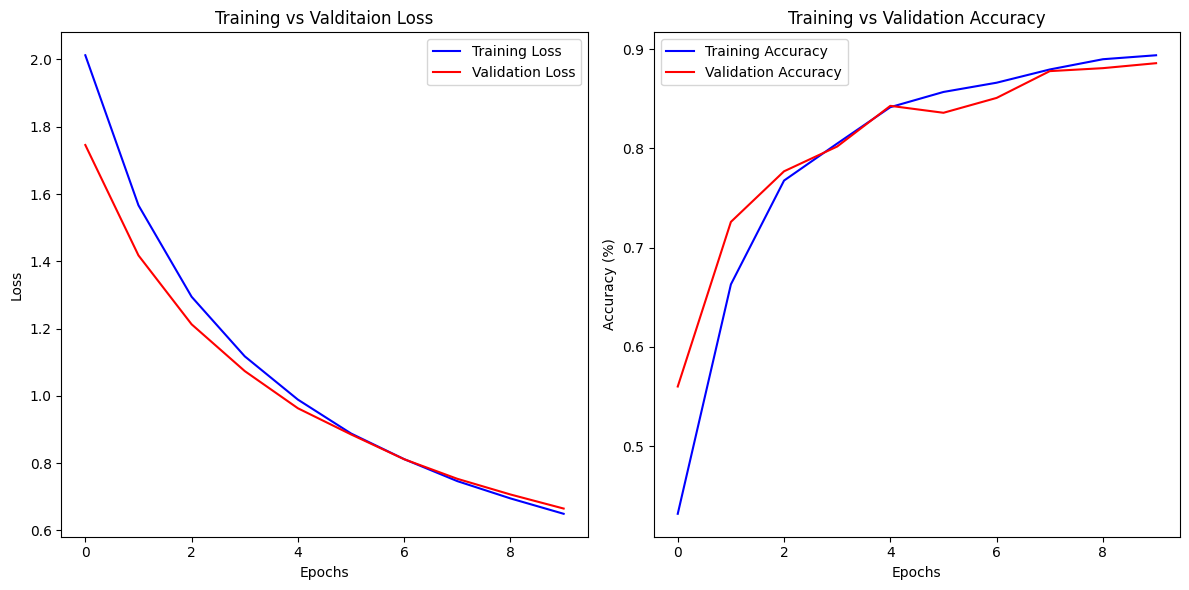

time: 614 ms (started: 2025-01-18 15:43:49 +00:00)


In [ ]:
%%script echo skipping

# Base model plot acc and loss
plot_results(Train_loss, Val_loss, Train_accuracy, Val_accuracy)

####Testing phase

In [ ]:
%%script echo skipping

# Prediction classification report
y_pred, y_test = prediction(model, test_loader)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.98      0.97      0.97       100
           2       0.93      0.87      0.90       100
           3       0.92      0.88      0.90       100
           4       0.82      0.77      0.79       100
           5       0.91      0.95      0.93       100
           6       0.78      0.88      0.83       100
           7       0.73      0.79      0.76       100
           8       0.95      0.79      0.86       100
           9       0.89      0.98      0.93       100

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

time: 39 ms (started: 2025-01-18 15:43:49 +00:00)


### Experiment number 1

Defining Experiment 1 model, loss function, optimizer

---

For experiment 1 we added a hidden layer, while keeping the same CrossEntropyLoss and Adam.

In [ ]:
%%script echo skipping

# Adding hiden layer with size 32
model_one = Base_Model([28*28, 64, 10]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer_one = optim.Adam(model_one.parameters())
model_one

Base_Model(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)

time: 4.5 ms (started: 2025-01-18 15:43:49 +00:00)


####Training phase

In [ ]:
%%script echo skipping

Train_loss, Train_accuracy, Val_loss, Val_accuracy = train_and_evaluate(model_one, train_loader, val_loader, criterion, optimizer_one, n_epochs=10)


Epoch: 1/10
Time:  0.1519622802734375 s
Training Loss:  1.9670767226117722
Train Accuracy Score: 43.93333333333334
Validation Loss:  1.5896492153406143
Validation Accuracy Score: 68.4

Epoch: 2/10
Time:  0.13486027717590332 s
Training Loss:  1.3074559201585485
Train Accuracy Score: 73.3
Validation Loss:  1.0737630166113377
Validation Accuracy Score: 79.0

Epoch: 3/10
Time:  0.11450552940368652 s
Training Loss:  0.9013750020493853
Train Accuracy Score: 82.73333333333333
Validation Loss:  0.7800646722316742
Validation Accuracy Score: 84.89999999999999

Epoch: 4/10
Time:  0.1624746322631836 s
Training Loss:  0.6626142415594547
Train Accuracy Score: 88.23333333333333
Validation Loss:  0.5983528979122639
Validation Accuracy Score: 88.5

Epoch: 5/10
Time:  0.2321009635925293 s
Training Loss:  0.5170026865411312
Train Accuracy Score: 91.06666666666666
Validation Loss:  0.493092717602849
Validation Accuracy Score: 90.0

Epoch: 6/10
Time:  0.161576509475708 s
Training Loss:  0.4168349831028187

Plotting train vs validation

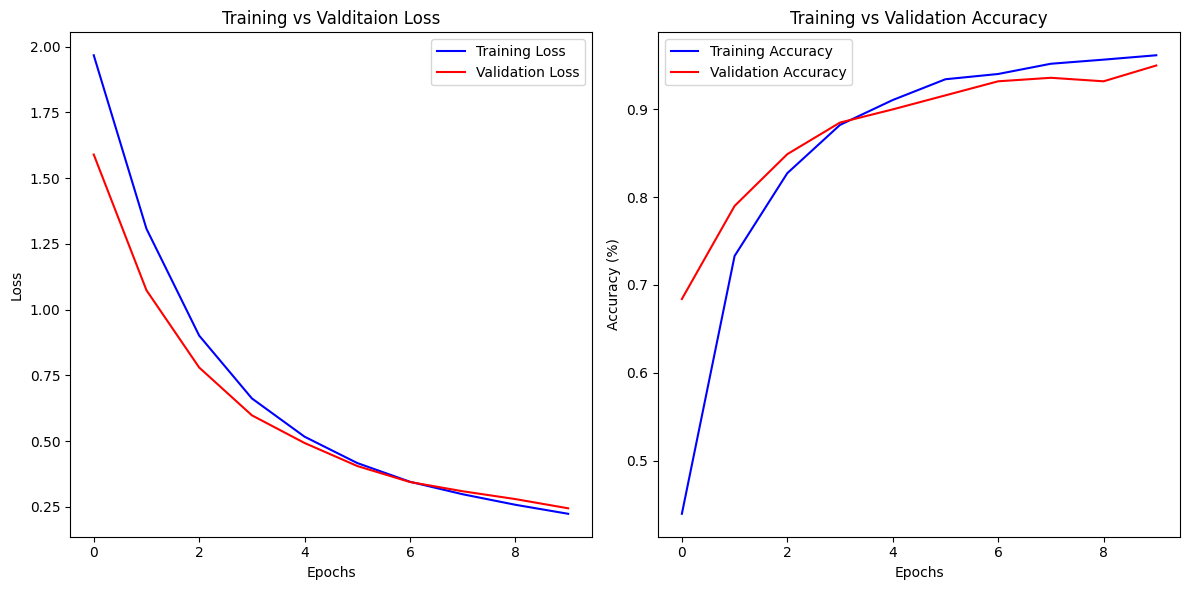

time: 1.29 s (started: 2025-01-18 15:43:52 +00:00)


In [ ]:
%%script echo skipping

plot_results(Train_loss, Val_loss, Train_accuracy, Val_accuracy)

#### Testing phase

Printing a `classification_report`

In [ ]:
%%script echo skipping

y_pred, y_test = prediction(model_one, test_loader)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      0.99      0.99       100
           2       0.97      0.97      0.97       100
           3       0.98      0.90      0.94       100
           4       0.91      0.90      0.90       100
           5       0.95      0.99      0.97       100
           6       0.92      0.92      0.92       100
           7       0.86      0.94      0.90       100
           8       0.99      0.89      0.94       100
           9       0.93      1.00      0.97       100

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

time: 94.4 ms (started: 2025-01-18 15:43:53 +00:00)


### Experiment number 2

Defining Experiment 2 model, loss function, optimizer

---

In experiment 2 we chose `Base_Model` to be the base of the experiment.
This time we changed the `batch_size` and `lr`

#### Data loader

In [ ]:
%%script echo skipping

# Create DataLoaders with different batch size for experiment 2.
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_sampler = RandomSampler(train_dataset)
train_loader = DataLoader(train_dataset, sampler=train_sampler, batch_size=128)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=128)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=128)

print("Data preparation complete.")

Data preparation complete.
time: 1.12 ms (started: 2025-01-18 15:43:54 +00:00)


Defining Experiment 2 model, loss function, optimizer

In [ ]:
%%script echo skipping

# different learning rate for experiment 2.
model_two = Base_Model([28*28,64, 10]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer_two = optim.Adam(model_two.parameters(), lr=0.003)
model_two

Base_Model(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)

time: 10.9 ms (started: 2025-01-18 15:43:54 +00:00)


####Training phase

In [ ]:
%%script echo skipping

Train_loss, Train_accuracy, Val_loss, Val_accuracy = train_and_evaluate(model_two, train_loader, val_loader, criterion, optimizer_two, n_epochs=10)


Epoch: 1/10
Time:  0.30382370948791504 s
Training Loss:  1.9188293367624283
Train Accuracy Score: 38.1
Validation Loss:  1.4224407374858856
Validation Accuracy Score: 65.10000000000001

Epoch: 2/10
Time:  0.20416688919067383 s
Training Loss:  1.0987973709901173
Train Accuracy Score: 74.5
Validation Loss:  0.8500021547079086
Validation Accuracy Score: 78.0

Epoch: 3/10
Time:  0.1906130313873291 s
Training Loss:  0.6647528087099394
Train Accuracy Score: 85.06666666666666
Validation Loss:  0.5590449832379818
Validation Accuracy Score: 87.9

Epoch: 4/10
Time:  0.09240865707397461 s
Training Loss:  0.45605173458655673
Train Accuracy Score: 91.23333333333333
Validation Loss:  0.4110831953585148
Validation Accuracy Score: 91.5

Epoch: 5/10
Time:  0.12396430969238281 s
Training Loss:  0.3389554023742676
Train Accuracy Score: 93.56666666666666
Validation Loss:  0.324365571141243
Validation Accuracy Score: 92.5

Epoch: 6/10
Time:  0.12679028511047363 s
Training Loss:  0.26333692980309326
Train 

Plotting train vs validation

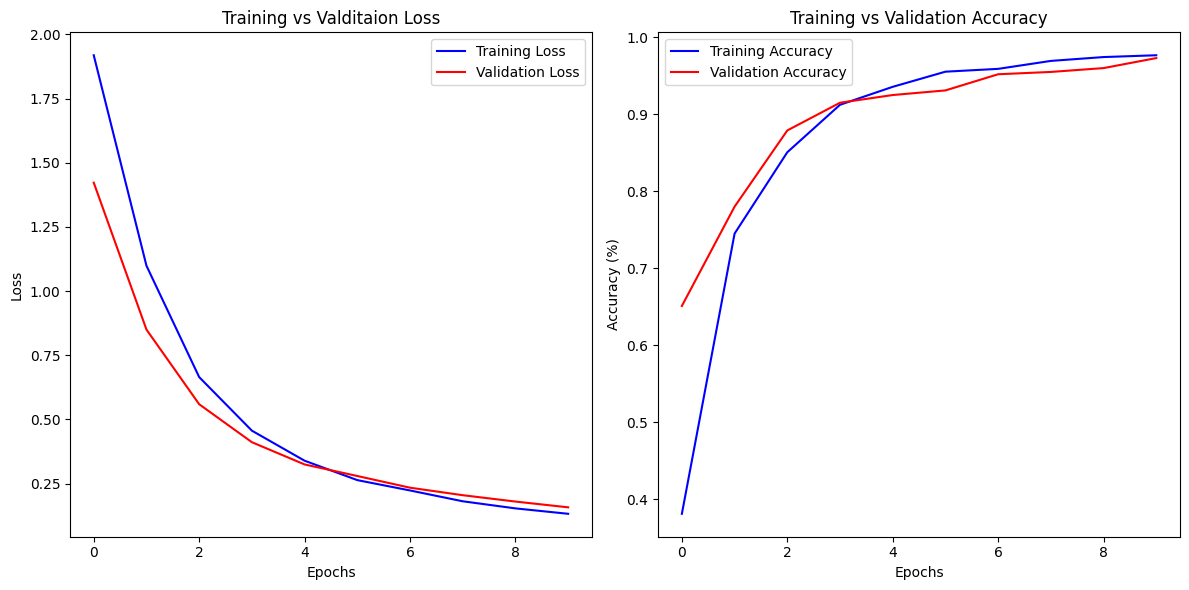

time: 730 ms (started: 2025-01-18 15:43:56 +00:00)


In [ ]:
%%script echo skipping

plot_results(Train_loss, Val_loss, Train_accuracy, Val_accuracy)

#### Training phase
Printing a `classification_report`

In [ ]:
%%script echo skipping

y_pred, y_test = prediction(model_two, test_loader)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       1.00      0.99      0.99       100
           2       0.99      0.98      0.98       100
           3       0.99      0.94      0.96       100
           4       0.95      0.91      0.93       100
           5       0.94      0.99      0.97       100
           6       0.94      0.94      0.94       100
           7       0.91      0.96      0.93       100
           8       0.99      0.96      0.97       100
           9       0.98      1.00      0.99       100

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

time: 36.8 ms (started: 2025-01-18 15:43:56 +00:00)


In [ ]:
%%script echo skipping

end=time.time()
print("total running time: ", end-start)

total running time:  23.987732648849487
time: 3.45 ms (started: 2025-01-18 15:43:56 +00:00)


### Save Trained model




In [ ]:
%%script echo skipping

# We chose MODEL 2 - with hidden layers.
torch.save(model_two, 'chosen_model.pth')

time: 20.4 ms (started: 2025-01-18 15:43:56 +00:00)


## Test Environment (of part 2 only)

### Downloading the model from the student's drive

Please run this code block to import libraries

In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ["TORCH_USE_CUDA_DSA"] = 'TRUE'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Please download the model

In [2]:
!gdown --id 1YyPuLs8_eZ4xdevcmRmdf_VVurPnLmvZ

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YyPuLs8_eZ4xdevcmRmdf_VVurPnLmvZ
To: /content/chosen_model.pth
100% 207k/207k [00:00<00:00, 61.5MB/s]


### Load trained model

In [ ]:
class Base_Model(nn.Module):
    def __init__(self, size_list):
        super(Base_Model, self).__init__()
        layers = []
        self.size_list = size_list
        for i in range(len(size_list) - 2):
            layers.append(nn.Linear(size_list[i], size_list[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(size_list[-2], size_list[-1]))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

In [ ]:
# LOAD THE TRAINED MODEL
model = torch.load('chosen_model.pth')
model.eval()

<ipython-input-41-80e3bd48b0dc>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('chosen_model.pth')


Base_Model(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)

### Single prediction

*Please browse the files you want to upload for evaluation*

Saving 0_example.npy to 0_example.npy
Saving 1_example.npy to 1_example.npy
Saving 2_example.npy to 2_example.npy
Saving 3_example.npy to 3_example.npy
Saving 4_example.npy to 4_example.npy
Saving 5_example.npy to 5_example.npy
Saving 6_example.npy to 6_example.npy
Saving 7_example.npy to 7_example.npy
Saving 8_example.npy to 8_example.npy
Saving 9_example.npy to 9_example.npy
Uploaded files: ['0_example.npy', '1_example.npy', '2_example.npy', '3_example.npy', '4_example.npy', '5_example.npy', '6_example.npy', '7_example.npy', '8_example.npy', '9_example.npy']
Selected file: 0_example.npy, Predicted class: 0


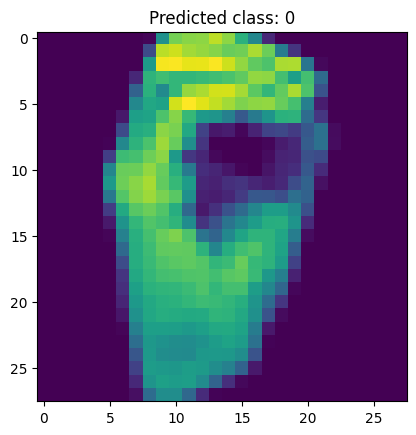

Selected file: 1_example.npy, Predicted class: 1


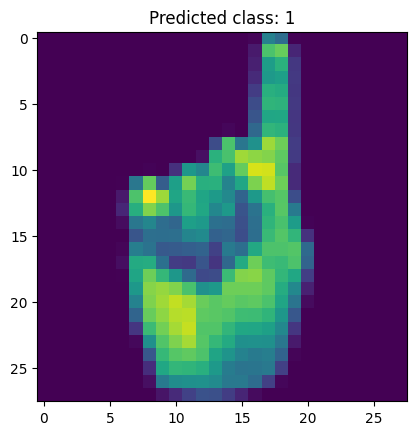

Selected file: 2_example.npy, Predicted class: 2


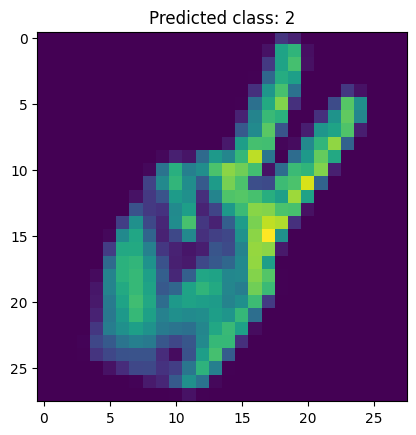

Selected file: 3_example.npy, Predicted class: 3


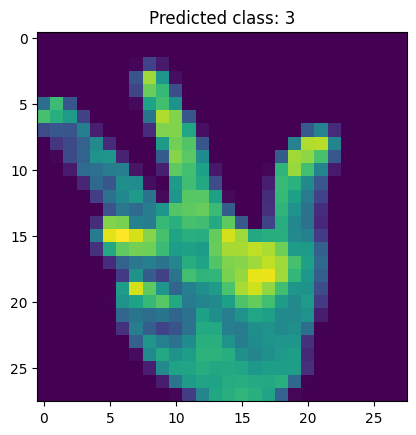

Selected file: 4_example.npy, Predicted class: 4


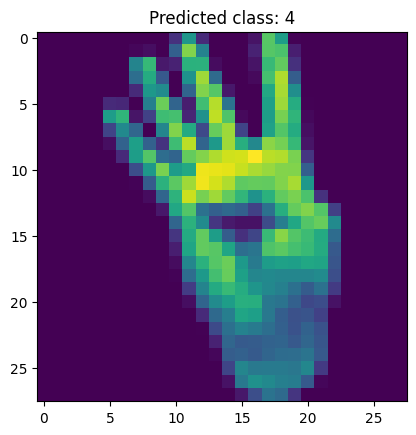

Selected file: 5_example.npy, Predicted class: 5


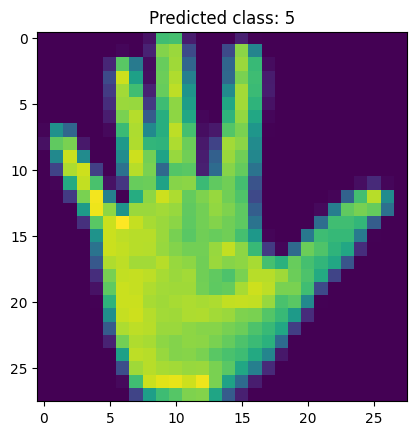

Selected file: 6_example.npy, Predicted class: 6


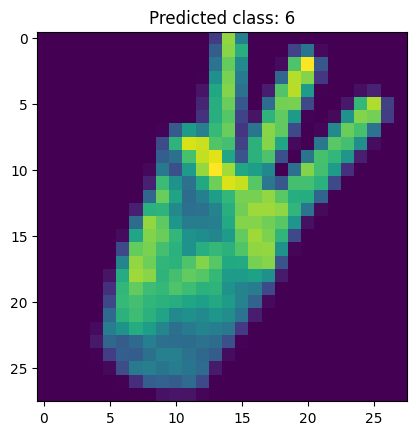

Selected file: 7_example.npy, Predicted class: 7


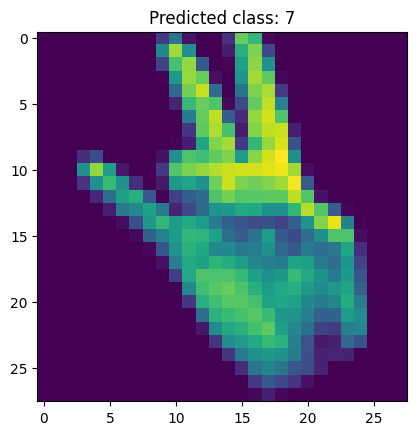

Selected file: 8_example.npy, Predicted class: 8


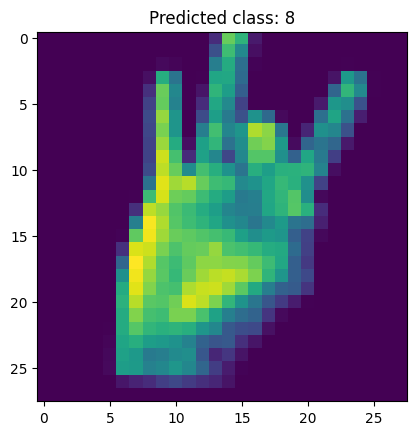

Selected file: 9_example.npy, Predicted class: 9


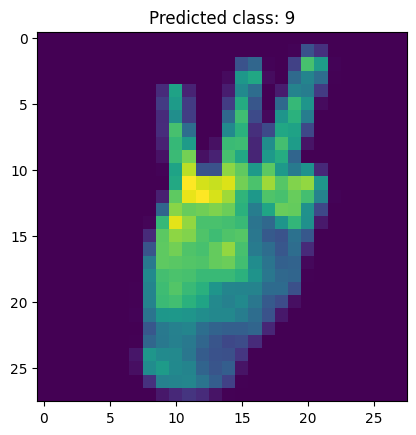

In [ ]:

from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

uploaded_files = files.upload()
file_names = list(uploaded_files.keys())
print("Uploaded files:", file_names)

for file_name in file_names:
    input_data = np.load(file_name)
    input_data = input_data.reshape(28, 28)
    input_tensor = torch.tensor(input_data, dtype=torch.float32).to(device)
    # Reshape to match the model's input
    input_tensor = input_tensor.view(1, -1)
    input_tensor = input_tensor / 255  # Normalize if necessary

    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)

    # Print prediction results
    print(f"Selected file: {file_name}, Predicted class: {predicted.item()}")

    # Plot the image
    plt.imshow(input_data)
    plt.title(f"Predicted class: {predicted.item()}")
    plt.show()
